In [1]:
import pandas as pd
import numpy as np
import utils

Using TensorFlow backend.


# Data Preparation

In [2]:
spcpath = './data/'
LAN_CSV_DCT, spc_csv = utils.read_csv(spcpath)
LAN_NAME_ARR = np.array(spc_csv['LAN'])[:-2] # exclude MIN & MAX
LAN_NAME_LST = list(LAN_NAME_ARR)

Check all 210 files ...
Got 27 cfr files
['RTL8112' 'RTL8112L' 'RTL8131' '82567LF' 'RTL8103EL' 'AR8131L-AL1E'
 'WG82578DM' 'RTL8111E-VB' 'WG82567V' 'WG82583V' 'WG82579V' 'AR8151'
 'RTL8111E-VL' 'WG82579LM' 'RTL8111F-VB' 'AR8161-AL3A-R' 'AR8161-BL3A-R'
 'RTL8111DP-VC' 'WGI217V' 'RTL8111G-CG' 'RTL8111GR-CG' 'WGI217LM'
 'WGI218V' 'WGI211AT(A2)' 'WGI218LM' 'RTL8111EP-CG' 'RTL8111H-CG']


In [3]:
print (spc_csv.head(3))

        LAN    Year  Month  New  IC Surge L2L  MB Surge Normal L2G  \
0   RTL8112  2009.0    1.0  0.0           1.0                  4.0   
1  RTL8112L  2009.0    3.0  0.0           1.0                  4.0   
2   RTL8131  2009.0    3.0  0.0           1.0                  4.0   

   MB Surge Normal L2L  MB Surge Air Discharge L2G  \
0                  1.0                         6.0   
1                  1.0                         6.0   
2                  1.0                         6.0   

   MB Surge Air Discharge L2L  MB Surge Guard L2G  MB Surge Guard L2L  \
0                         1.0                15.0                 6.0   
1                         1.0                15.0                 6.0   
2                         1.0                15.0                 6.0   

   Power Pin  ESD  
0        6.0  8.0  
1        6.0  8.0  
2        6.0  8.0  


In [4]:
# NORMALIZE ALL VALUES

raw_spc = np.array(spc_csv.iloc[:,1:]) # exclude name
S_ALL = utils.create_S(raw_spc)
s_scaler, S_ALL_NORM = utils.scale(S_ALL)

from sklearn.externals import joblib 
joblib.dump(s_scaler, './ongo/s_scaler.pkl')

print ("S_ALL_NORM.shape: {0}".format(S_ALL_NORM.shape))

# put S_ALL if you want to see original value
_ = utils.show_spc(S_ALL_NORM, LAN_NAME_ARR)



S_ALL_NORM.shape: (29, 13)
|             |Tmst |Year |Mont |New  |IC2L |Nm2G |Nm2L |AD2G |AD2L |Gd2G |Gd2L |PwPn |ESD  |
|LAN          |a_Ts |b_Yr |c_Mt |d_N  |e_IL |f_NG |g_NL |h_AG |i_AL |j_GG |k_GL |l_Pn |m_ED |
|-            |-    |-    |-    |-    |-    |-    |-    |-    |-    |-    |-    |-    |-    |
|RTL8112      | 0.25| 0.27| 0.00| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|RTL8112L     | 0.26| 0.27| 0.18| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|RTL8131      | 0.26| 0.27| 0.18| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|82567LF      | 0.28| 0.27| 0.55| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|RTL8103EL    | 0.29| 0.27| 0.64| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|AR8131L-AL1E | 0.30| 0.27| 0.82| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.25| 0.40|
|WG82578DM    | 0.31| 0.33| 0.00| 0.00| 0.05| 0.20| 0.05| 0.30| 0.05| 0.75| 0.30| 0.30| 0.40|
|RTL8111E-VB  | 0.32| 0.33| 0.09|

In [31]:
s_scaler, S_ALL_NORM = utils.scale(S_ALL)
print(S_ALL_NORM.shape)
print(S_ALL.shape)

(29, 13)
(29, 13)


In [34]:
evl = [  -1.,2011.,   1.,  -1.,   1.,   4.,   1.,   6.,   1.,  15.,    6,  7.5,   8.]
E = np.array(evl).reshape(1,13)
print(E.shape)
print(evl)
a = s_scaler.transform(E)
print(a.shape)
print(a)

(1, 13)
[-1.0, 2011.0, 1.0, -1.0, 1.0, 4.0, 1.0, 6.0, 1.0, 15.0, 6, 7.5, 8.0]
(1, 13)
[[-2.19915133  0.4         0.         -0.2         0.05        0.2
   0.05        0.3         0.05        0.75        0.3         0.375
   0.4       ]]


In [9]:
EVL = [4.2183037246547723e-05, 0.002625606750479998, 0.007767627189524637, 0.01481654416409266, 0.023502413189718553, 0.03144449132576447, 0.03839711349234197, 0.045434937272872074, 0.05332307468743809, 0.06069709043474695, 0.0684633950990313, 0.07644651591393674, 0.0808717182430239, 0.0890245227435018, 0.0968026974543198, 0.10418654357588598, 0.11162784453087729, 0.11824287481302119, 0.12487077613990621, 0.13138564003399764, 0.13801315830556596, 0.1439671602368723, 0.15047085569210314, 0.15701827912822153, 0.16365928580843062, 0.17104796787852639, 0.17731265275801256, 0.18404041648886316, 0.18967563134060206, 0.19575341381062367, 0.20154822949802056, 0.20680742520396558, 0.21255137538305854, 0.21820448076019566, 0.22421014492968333, 0.23045149645366061]
FVB = [7.11784098230761e-06, 0.000665180790464451, 0.004723469917647749, 0.012951255682638052, 0.20645496690771653, 0.4688920186732627, 0.5444673110161181, 0.559597794080977, 0.6418782293647134, 0.7939102351415266, 0.9458222604537322, 1.0364394253272189, 1.1253277421484327, 1.1491352416471883, 1.1784515496619752, 1.2069604430374732, 1.3068247171155107, 1.408970309966361, 1.516473169843361, 1.5470364866663309, 1.5763248182234553, 1.6061077430001152, 1.6418845003385614, 1.6736900855111905, 1.7119975903836817, 1.7461457376140546, 1.784495037449489, 1.9127986600248004, 1.9557309034337163, 2.093118761624237, 2.1379381323882054, 2.3835510499290606, 2.5351267713229606, 2.693007917159222, 2.8571888717894427, 2.92315287705164]
GCG = [2.3344386900530733e-05, 0.0003243081474900774, 0.001947895837930258, 0.004097611960760852, 0.006402193540168983, 0.00933817598498358, 0.011815858319077258, 0.014237488948155182, 0.016303374697613095, 0.018125351852115165, 0.019969085621075567, 0.022023551374050782, 0.023348188202221613, 0.024953967086857053, 0.02711351627995181, 0.02938683729341572, 0.03110609894912513, 0.0320104756077032, 0.033241160277712345, 0.03403640997695265, 0.035516290234119195, 0.036601799392405696, 0.03845655352281564, 0.03979257619663379, 0.040983704634879624, 0.043072739225103546, 0.04448665487536236, 0.04701741751500684, 0.04894289491906121, 0.0508534637292716, 0.052126826483622664, 0.05553734601081075, 0.057746787699741856, 0.0606530119285497, 0.06323733899060137, 0.06545505333536708]
GRC = [2.807634159429147e-06, 0.00030324155770269917, 0.0015699138328952107, 0.003330307280402016, 0.005484347998345567, 0.007529027124003197, 0.00949335407869328, 0.011486269430470028, 0.013721621105608543, 0.0155023384357202, 0.01740019826903644, 0.018743108622092327, 0.02015098347718718, 0.02208921328269537, 0.02335100071733575, 0.07040277910403253, 0.07311669809136866, 0.07630568460881175, 0.078970764672734, 0.08146413778221806, 0.08433478942951442, 0.08694917308934458, 0.08986159946418436, 0.092552307755695, 0.0957764352411926, 0.0989487690164984, 0.10208655725714019, 0.10466293128420852, 0.10790640431198595, 0.11153174633410953, 0.11486207998848075, 0.11844859271311134, 0.12276208540760546, 0.12718414009882148, 0.1317929300438102, 0.1362125321017627]
HCG = [6.0696600271093185e-06, 8.289914799318624e-05, 0.00037934344501502746, 0.0008560972710290929, 0.001664907110705842, 0.0027616220066718987, 0.0038675181933098463, 0.005126379682264365, 0.006714552061528049, 0.00969173543253426, 0.011874749396228793, 0.01307731132466734, 0.016253779779882044, 0.01795929866283075, 0.02476853735195712, 0.026178848821425623, 0.03312219858461902, 0.034934298643067595, 0.03686526848627236, 0.03873573297311046, 0.04054812397250871, 0.04237038934142108, 0.04533963821620141, 0.048037783145460325, 0.05031129800733527, 0.05335593016119716, 0.05498270583482138, 0.05891071330315737, 0.06214485105474048, 0.06714733018682455, 0.0709153973526269, 0.07776735180006682, 0.09156434307453301, 0.08749182200081758, 0.09100671486433741, 0.09902680315791976]

LANA = np.array(EVL).reshape(1,36,1)
LANB = np.array(FVB).reshape(1,36,1)
LANC = np.array(GCG).reshape(1,36,1)
LAND = np.array(GRC).reshape(1,36,1)
LANE = np.array(HCG).reshape(1,36,1)

M = np.concatenate((LANA, LANB, LANC, LAND, LANE), axis=0)
print(M.shape)

(5, 36, 1)


Target ids: [12, 19, 20, 26]
c_norm.shape: (4, 36, 1)


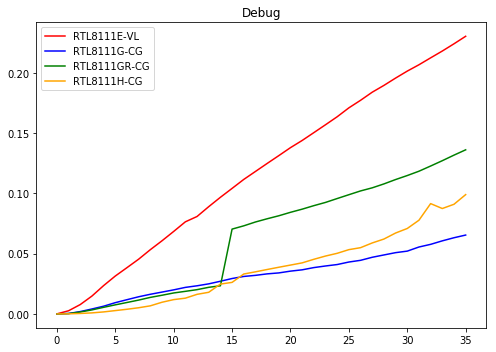

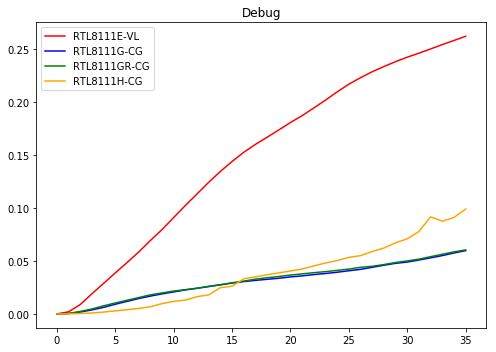

Q.shape: (4, 30, 15)
Q[0, 0:5, 0:5]:
['0.00', '0.00', '0.38', '0.40', '0.00']
['0.02', '0.00', '0.38', '0.40', '0.00']
['0.04', '0.01', '0.38', '0.40', '0.00']
['0.06', '0.03', '0.38', '0.40', '0.00']
['0.08', '0.07', '0.38', '0.40', '0.00']


In [10]:

"""
check function
"""

M = np.concatenate((LANA, LANC, LAND, LANE), axis=0)


FORDBG = ['RTL8111E-VL', 'RTL8111G-CG', 'RTL8111GR-CG', 'RTL8111H-CG']


DBG_SET = sorted(set(spc_csv.loc[spc_csv['LAN'].isin(FORDBG)].index.tolist()))
U, N, _ = utils.create_C(LAN_CSV_DCT, LAN_NAME_ARR, DBG_SET)
utils.plot_results('Debug', M, ['-'] * (len(DBG_SET)) , utils.DEF_CLR, LAN_NAME_ARR[DBG_SET],
             [1] * (len(DBG_SET)), 36, 36, save_flag=False)
utils.plot_results('Debug', N, ['-'] * (len(DBG_SET)) , utils.DEF_CLR, LAN_NAME_ARR[DBG_SET],
             [1] * (len(DBG_SET)), 36, 36, save_flag=False)
_, R, Q, W = utils.get_xy_from_sAc(S_ALL_NORM[DBG_SET], U[:, :30, :], 30, list(range(len(U))))
print("Q.shape: {0}".format(Q.shape)) 
print("Q[0, 0:5, 0:5]:")
for row in Q[0, 0:5, 0:5]:
    fp = ["{:0.2f}".format(v) for v in row]
    print(fp)

# Prepare Keras

# <<固定seed>>

In [11]:
RANDOM_SEED = '43'

import tensorflow as tf
import random as rn

# 以下是 Python 3.2.3 以上所必需的，
# 为了使某些基于散列的操作可复现。
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/keras-team/keras/issues/2280#issuecomment-306959926

import os
os.environ['PYTHONHASHSEED'] = '0'

# 以下是 Numpy 在一个明确的初始状态生成固定随机数字所必需的。

np.random.seed(int(RANDOM_SEED))

# 以下是 Python 在一个明确的初始状态生成固定随机数字所必需的。

rn.seed(int(RANDOM_SEED))

# 强制 TensorFlow 使用单线程。
# 多线程是结果不可复现的一个潜在的来源。
# 更多详情，见: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res
# !! for 效能因素，此次暫不使用 !!
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K
import keras

# `tf.set_random_seed()` 将会以 TensorFlow 为后端，
# 在一个明确的初始状态下生成固定随机数字。
# 更多详情，见: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(int(RANDOM_SEED))

# !! for 效能因素，此次暫不使用 !!
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

# import tensorflow as tf

# config = tf.ConfigProto()
# GPU 記憶體不夠時增加
session_conf.gpu_options.allow_growth = True
# 只使用 10% 的 GPU 記憶體
session_conf.gpu_options.per_process_gpu_memory_fraction = 0.25

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# sess = tf.Session(config=session_conf)
# 設定 Keras 使用的 TensorFlow Session
K.set_session(sess)

In [12]:
import math
import h5py
import scipy
from scipy import ndimage
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.python.framework import ops

from keras.models import load_model, Model, Sequential
from keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, GRU,\
                         Multiply, Flatten, Embedding, SimpleRNN, RepeatVector, Dense, Activation, Lambda, Reshape,\
                         Dropout
from keras import callbacks as Kcallback
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Activation

from keras import __version__ as keras__version__


In [13]:
import sys
print("python: {}, keras: {}, tensorflow: {}".format(sys.version, keras__version__, tf.__version__))

python: 3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609], keras: 2.1.6, tensorflow: 1.5.0


# Build Sub Processes

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image

def round_part_tra(X, Y, tras, vals, R, ts, hn, i_dim, o_dim, n_ep, bs, dp, pstr, nfx):
    print ("Create layers and model ...")
    model_tra = utils.lstm_train_model(ts, hn, i_dim, o_dim, dp)
    model_tra.compile(optimizer='adam', loss='mse', metrics=['mse'])
    print ("Done")

    print ("Begin training ...")
    traModelPath = "./ongo/CFR_MODEL_LSTM[" + pstr + "]_Model_R" + str(R) + nfx + ".h5"
    checkpoint = Kcallback.ModelCheckpoint(
        traModelPath, monitor='val_loss', verbose=0, save_best_only=False, mode='auto')
    earlyStopping = Kcallback.EarlyStopping(
        monitor='val_loss', min_delta=0, patience=400, verbose=0, mode='auto')
    kendall = KendallCallback()
    model_callbacks = [earlyStopping,checkpoint,kendall]
    history = model_tra.fit([X[tras]], Y[tras], epochs=n_ep, batch_size=bs,
                            validation_data=(X[vals], Y[vals]), callbacks=model_callbacks, verbose = 0)
    print ("Done")
    #SVG(model_to_dot(inference_model, show_shapes=True).create(prog='dot', format='svg'))    
    #Image(model_to_dot(model_inf, show_shapes=True).create(prog='dot', format='png'))
    return traModelPath, history, kendall



In [15]:
def gen_XY(ftr_set, version, sel, c_scaler, debug = False):
    
    
    def scale_lst_to_arr(scaler, lst):
        return np.array([scaler.transform(v) for v in lst]).reshape(len(lst))

    #print("Get scaler using specifc LAN set ...")
    #NAMES_SET = LN5_SET
    #TARGET = sorted(set(spc_csv.loc[spc_csv['LAN'].isin(NAMES_SET)].index.tolist()))
    #_, _, c_scaler = utils.create_C(LAN_CSV_DCT, LAN_NAME_ARR, TARGET)
    
    print("Scaling selection ...")
    _, C_SEL, _ = utils.create_C(LAN_CSV_DCT, LAN_NAME_ARR, sel)
    
    A = C_SEL.reshape(C_SEL.shape[0], C_SEL.shape[1])    
    
    L = []
    [L.append(scale_lst_to_arr(c_scaler, arr)) for arr in A]
    C = np.array(L).reshape(A.shape[0], A.shape[1], 1)
    
    S = S_ALL_NORM[sel]
    ts_tra = 30; ts_prd = 36
    _, _, F, Y = utils.get_xy_from_sAc(S[:, ftr_set], C[:,:ts_tra,:], ts_tra, list(range(C.shape[0])))
    X = F[:,:,(3-version):]
    print("Got X of shape {0}, Y of shape {1}".format(X.shape, Y.shape))
    
    return X, Y

# Combine Processes into one Round for Experiment

In [16]:


def experiment(TARGET, S, C, tras, vals, tsts, repeats = 3, VERSION = 3,
               logdest = "./log.txt", imgpath = './ongo/', nfx = "_"):
    

    print("Begin experiment ...")
    """
    PREPARE & FIT, using version number to determine the X 
    """
    ts_tra = 30; ts_prd = 36
    _, _, F, Y = utils.get_xy_from_sAc(S, C[:, :, :], ts_prd, list(range(len(C))))
    X = F[:,:,(3-VERSION):]
    print("F.shape: {0}, X.shape: {1}".format(F.shape, X.shape))
    print(F[0, :3, :4])
    print("Y.shape: {0}".format(Y.shape))
    print("{0}\n".format(Y[0, :3, :].T))
    
    input_features = X.shape[2] # num of ftr
    hidden_neurons = 512; output_features = 1; num_epochs = 449; batch_size = 3; drop_rate = 0.001
    
    para_string = ""
    for k in utils.LYR_LST:
        para_string += k[0].upper()+utils.ACT_DCT[k][0]
    para_string += "_f"+str(input_features)+"hn"+str(hidden_neurons)+"bs"+str(batch_size)+"dp"+str(drop_rate)
    
    BEST_MSE_CUT = 1; BEST_PRD = None; BEST_STR = None; BEST_R = 0;
    for R in range(repeats):
    
        print ("Round {0}!".format(R))

        traModelPath, history, kendall = round_part_tra(X[:,:ts_tra,:], Y[:,:ts_tra,:], tras, vals, R,
                                                        ts_tra, hidden_neurons,
                                                        input_features, output_features, num_epochs,
                                                        batch_size, drop_rate, para_string, nfx)

        ktl = ["{0}: {1:0.5f}".format(k, kendall.z_lst[k]) for k in kendall.z_lst]
        kts = ktl[0]
        for v in ktl[1:]:
            kts += ", " + v
        print("\nkendall.z_lst:\n{0}\n".format(kts))
        
        
        utils.plot_training_process("DEBUG", history, imgpath="./")

        model_inf = utils.round_part_inf(traModelPath, input_features, output_features, hidden_neurons, ts_prd)
        
        all_pred = utils.round_part_prd_exp(model_inf, F, ts_prd, hidden_neurons, version=VERSION)
        
        mse_all, mse_cut = utils.round_part_mse(all_pred, X, Y, ts_tra)
        
        ttl_str = "R"+str(R)+"_"+para_string+"_mse{:0.3f}".format(mse_all)+"_cut{:0.3f}".format(mse_cut)+nfx
        log_str = "R"+str(R)+"_"+para_string+"_mse{:0.8f}".format(mse_all)+"_cut{:0.8f}".format(mse_cut)+nfx

        print ("Output result ...")
        print (log_str+"\n")
        with open(logdest, 'a') as the_file:
            the_file.write(log_str + "\n")
            """
            uncomment if you wnat to write the epoch with zero kendall tau out
            """
            # the_file.write(kts + "\n")
        
        if mse_cut < BEST_MSE_CUT:
            BEST_MSE_CUT = mse_cut; BEST_PRD = all_pred; BEST_STR = ttl_str; BEST_R = R;

        # end of one repeat
    
    num_in_tra = len(TARGET)
    utils.plot_results(nfx + "_R" + str(BEST_R),
                       np.concatenate((C, BEST_PRD), axis = 0),
                       ['-'] * num_in_tra + ['^'] * num_in_tra,
                       utils.DEF_CLR[0:num_in_tra] * 2,
                       [LAN_NAME_ARR[TARGET][i][7:11] for i in range(num_in_tra)],
                       [1] * num_in_tra + [0] * num_in_tra, 30, 36 , imgpath = imgpath, save_flag=False)
    
    return

# Setup Training Set, Feature Space and others

In [17]:
LN5_SET = ['RTL8111E-VL', 'RTL8111F-VB', 'RTL8111G-CG', 'RTL8111GR-CG', 'RTL8111H-CG']
L10_SET = ['RTL8111E-VL', 'RTL8111F-VB', 'RTL8111G-CG', 'RTL8111GR-CG', 'RTL8111H-CG',
           'AR8131L-AL1E', 'WG82579V', 'AR8161-AL3A-R', 'WGI217V', 'WGI218V']
LN8_SET = ['RTL8111E-VL', 'RTL8111F-VB', 'RTL8111G-CG', 'RTL8111GR-CG', 'RTL8111H-CG',
           'AR8131L-AL1E', 'WG82579V', 'WGI218V']
LTB_SET = ['RTL8112L', 'AR8131L-AL1E', 'RTL8111E-VB', 'RTL8111E-VL', 'RTL8111F-VB',
           'AR8161-BL3A-R', 'RTL8111G-CG', 'RTL8111GR-CG', 'WGI218V', 'RTL8111H-CG']
L27_SET = ['RTL8112', 'RTL8112L', 'RTL8131', '82567LF', 'RTL8103EL', 'AR8131L-AL1E',
           'WG82578DM', 'RTL8111E-VB', 'WG82567V', 'WG82583V', 'WG82579V', 'AR8151',
           'RTL8111E-VL', 'WG82579LM', 'RTL8111F-VB', 'AR8161-AL3A-R', 'AR8161-BL3A-R',
           'RTL8111DP-VC', 'WGI217V', 'RTL8111G-CG', 'RTL8111GR-CG', 'WGI217LM',
           'WGI218V', 'WGI211AT(A2)', 'WGI218LM', 'RTL8111EP-CG', 'RTL8111H-CG']
L18_SET = ['RTL8112L', 'AR8131L-AL1E', 'RTL8111E-VB', 'WG82567V', 'WG82583V',
           'WG82579V', 'RTL8111E-VL', 'WG82579LM', 'RTL8111F-VB', 'AR8161-AL3A-R',
           'AR8161-BL3A-R', 'WGI217V', 'RTL8111G-CG', 'RTL8111GR-CG', 'WGI217LM',
           'WGI218V', 'WGI211AT(A2)', 'RTL8111H-CG']
L13_SET = ['RTL8112L', 'AR8131L-AL1E', 'RTL8111E-VB', 'WG82579V', 'RTL8111E-VL',
           'RTL8111F-VB', 'AR8161-AL3A-R', 'AR8161-BL3A-R', 'WGI217V', 'RTL8111G-CG',
           'RTL8111GR-CG', 'WGI218V', 'RTL8111H-CG']
L12_SET = ['RTL8112L', 'AR8131L-AL1E', 'RTL8111E-VB', 'WG82579V', 'RTL8111E-VL',
           'RTL8111F-VB', 'AR8161-AL3A-R', 'AR8161-BL3A-R', 'WGI217V', 'RTL8111G-CG',
           'RTL8111GR-CG', 'WGI218V']
L25_SET = ['RTL8112', 'RTL8112L', 'RTL8131', 'RTL8103EL', 'AR8131L-AL1E',
           'WG82578DM', 'RTL8111E-VB', 'WG82567V', 'WG82583V', 'WG82579V',
           'RTL8111E-VL', 'WG82579LM', 'RTL8111F-VB', 'AR8161-AL3A-R', 'AR8161-BL3A-R',
           'RTL8111DP-VC', 'WGI217V', 'RTL8111G-CG', 'RTL8111GR-CG', 'WGI217LM',
           'WGI218V', 'WGI211AT(A2)', 'WGI218LM', 'RTL8111EP-CG', 'RTL8111H-CG']

In [18]:
excluded_sets = []
excluded_sets.append([])

"""
Abnormal
"""
exclude0 = ['82567LF', 'AR8151']
excluded_sets.append(exclude0)
group_a = [v for v in LAN_NAME_LST if v not in excluded_sets[1]]
group_a_ids = [LAN_NAME_LST.index(v) for v in LAN_NAME_LST if v not in excluded_sets[1]]
"""
Below 1000
"""
excluded = ['WG82578DM', 'WGI218LM', 'RTL8112', 'RTL8131', 'RTL8111DP-VC', 'RTL8111EP-CG',
            'RTL8103EL'] # '82567LM'
excluded_sets.append(exclude0 + excluded)
group_b = [v for v in LAN_NAME_LST if v not in excluded_sets[2]]
"""
Exceed 1000, Below 10000
"""
exclude2 = ['WG82567V', 'WG82579LM', 'WG82583V', 'WGI211AT(A2)', 'WGI217LM']
excluded_sets.append(exclude0 + excluded + exclude2)
group_c = [v for v in LAN_NAME_LST if v not in excluded_sets[3]]

group_c_ids = [LAN_NAME_LST.index(v) for v in LAN_NAME_LST if v not in excluded_sets[3]]

"""
Exceed 10000, Below 70000
"""
exclude3 = ['WG82579V', 'WGI217V', 'AR8161-AL3A-R']
excluded_sets.append(exclude0 + excluded + exclude2 + exclude3)
group_d = [v for v in LAN_NAME_LST if v not in excluded_sets[4]]


In [19]:
print(len(group_a_ids))
print(group_c_ids)

25
[1, 5, 7, 10, 12, 14, 15, 16, 18, 19, 20, 22, 26]


In [20]:

"""
Determine the target set
"""
NAMES_SET = LTB_SET
TARGET = sorted(set(spc_csv.loc[spc_csv['LAN'].isin(NAMES_SET)].index.tolist()))
c_dft_norm, _, C_SCALER = utils.create_C(LAN_CSV_DCT, LAN_NAME_ARR, TARGET)
print("Dump c_scaler({0}, {1})".format(C_SCALER.data_min_, C_SCALER.data_max_))
joblib.dump(C_SCALER, './ongo/c_scaler.pkl')

"""
Determine the feature space and others
"""
VERSION = 2;
ftr_set = [0] + list(range(4, S_ALL_NORM.shape[1]))
TOLER = 0.01

Target ids: [1, 5, 7, 12, 14, 16, 19, 20, 22, 26]
c_norm.shape: (10, 36, 1)
Dump c_scaler([0.], [0.2620056])


In [21]:


Xkt, Ykt = gen_XY(ftr_set, VERSION, group_c_ids, C_SCALER)
print("Using above LANs to create callback ...")

class KendallCallback(Kcallback.Callback):
    def on_train_begin(self, logs={}):
        self.x_fkt = Xkt
        self.y_fkt = Ykt
        self.z_lst = {}

    def on_epoch_end(self, epoch, logs={}):
        
        y_vak = self.y_fkt
        y_hak = self.model.predict(self.x_fkt)
        
        y_val = self.validation_data[1]
        y_hat = self.model.predict(self.validation_data[0])

        A = list(y_vak[:,-1,:].reshape(-1))
        P = list(y_hak[:,-1,:].reshape(-1))

        dct1 = {}; dct2 = {};
        for i in range(len(A)):
            dct1[i] = A[i]; dct2[i] = P[i];
        kt = utils.kend_cust(dct1, dct2, tolerance = TOLER) # should be around 0.01~0.03
        logs["kendall"] = kt

        MSE_M = utils.mse(y_val, y_hat, axis=-1)
        mse_all = np.mean(MSE_M)

        if kt == 0:
            self.z_lst[epoch] = mse_all

        if epoch % 100 == 0:
            print("epoch: {0}, kt: {1} (toler. = {2})".format(epoch, kt, TOLER))
        return

print("Done")

Scaling selection ...
Target ids: [1, 5, 7, 10, 12, 14, 15, 16, 18, 19, 20, 22, 26]
c_norm.shape: (13, 36, 1)
Got X of shape (13, 30, 11), Y of shape (13, 30, 1)
Using above LANs to create callback ...
Done


In [25]:
print("NAMES_SET: {0}".format(NAMES_SET))
print("TARGET: {0}".format(TARGET))
#lfx = "L%02d" % (len(NAMES_SET),)
lfx = "LTB"
ffx = ""
for v in ftr_set:
    ffx += chr(v+97) # convert 0~12 to a~m
vfx = "v"+str(VERSION)
sfx = spcpath.replace("_", "")[-8:-4]
nfx = "_"+ffx+"_"+vfx+"_"+lfx+"_"+sfx
print("nfx: {0}".format(nfx))
print("spcpath: {0}".format(spcpath))

print("ftr_set: {0}, VERSION = {1}".format(ftr_set, VERSION))
s_all_norm_f = S_ALL_NORM[TARGET][:, ftr_set]
print("s_all_norm_f: {0}\n".format(s_all_norm_f.shape))

"""
X-Y output
"""
print("=== X-Y output ===")

s_fxy = S_ALL_NORM[group_a_ids][:, ftr_set]
_, c_sel, _ = utils.create_C(LAN_CSV_DCT, LAN_NAME_ARR, group_a_ids)

def scale_lst_to_arr(scaler, lst):
    return np.array([scaler.transform(v) for v in lst]).reshape(len(lst))

a_fxy = c_sel.reshape(c_sel.shape[0], c_sel.shape[1])
L = []
[L.append(scale_lst_to_arr(C_SCALER, arr)) for arr in a_fxy]
c_fxy = np.array(L).reshape(a_fxy.shape[0], a_fxy.shape[1], 1)

_, _, F, Y = utils.get_xy_from_sAc(s_fxy, c_fxy, 36, list(range(len(c_fxy))))
X = F[:,:,(3-VERSION):]
print("X.shape: {0}, Y.shape: {1}".format(X.shape, Y.shape))


"""
Note that LAN_NAME_ARR and group_a_ids are HARDCODED
"""
def outputA(outdest, array):

    with open(outdest, 'w') as outfile:

        outfile.write('# Array shape: {0}\n'.format(array.shape))
        cnt = 0
        for data_slice in array:
            outfile.write('# {0}\n'.format(LAN_NAME_ARR[group_a_ids[cnt]]))
            np.savetxt(outfile, data_slice, delimiter=",", fmt='%s')
            cnt += 1

    print("Save array of {0} to {1}".format(array.shape, outdest))
    return
    
outpath = './release/data/'
outputA(outpath + 'X.txt', X)
outputA(outpath + 'Y.txt', Y)

NAMES_SET: ['RTL8112L', 'AR8131L-AL1E', 'RTL8111E-VB', 'RTL8111E-VL', 'RTL8111F-VB', 'AR8161-BL3A-R', 'RTL8111G-CG', 'RTL8111GR-CG', 'WGI218V', 'RTL8111H-CG']
TARGET: [1, 5, 7, 12, 14, 16, 19, 20, 22, 26]
nfx: _aefghijklm_v2_LTB_spc1
spcpath: ./data/lan_spc_1.csv
ftr_set: [0, 4, 5, 6, 7, 8, 9, 10, 11, 12], VERSION = 2
s_all_norm_f: (10, 10)

=== X-Y output ===
Target ids: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
c_norm.shape: (25, 36, 1)
X.shape: (25, 36, 11), Y.shape: (25, 36, 1)
Save array of (25, 36, 11) to ./release/data/X.txt
Save array of (25, 36, 1) to ./release/data/Y.txt


NAMES_SET: ['RTL8112L', 'AR8131L-AL1E', 'RTL8111E-VB', 'RTL8111E-VL', 'RTL8111F-VB', 'AR8161-BL3A-R', 'RTL8111G-CG', 'RTL8111GR-CG', 'WGI218V', 'RTL8111H-CG']
TARGET: [1, 5, 7, 12, 14, 16, 19, 20, 22, 26]
nfx: _aefghijklm_v2_LTB_spc1
spcpath: ./data/lan_spc_1.csv
ftr_set: [0, 4, 5, 6, 7, 8, 9, 10, 11, 12], VERSION = 2
s_all_norm_f: (10, 10)

Begin experiment ...
F.shape: (10, 36, 12), X.shape: (10, 36, 11)
[[0.         0.         0.26148288 0.05      ]
 [0.02083333 0.000479   0.26148288 0.05      ]
 [0.04166667 0.00152075 0.26148288 0.05      ]]
Y.shape: (10, 36, 1)
[[0.000479   0.00152075 0.00595665]]

Round 0!
Create layers and model ...
Done
Begin training ...
epoch: 0, kt: 0.23076923076923078 (toler. = 0.01)
epoch: 100, kt: 0.0 (toler. = 0.01)
epoch: 200, kt: 0.0 (toler. = 0.01)
epoch: 300, kt: 0.0 (toler. = 0.01)
epoch: 400, kt: 0.0 (toler. = 0.01)
Done

kendall.z_lst:
3: 0.03527, 61: 0.00102, 100: 0.00553, 101: 0.00524, 102: 0.01342, 120: 0.00034, 121: 0.00044, 124: 0.00077, 133:

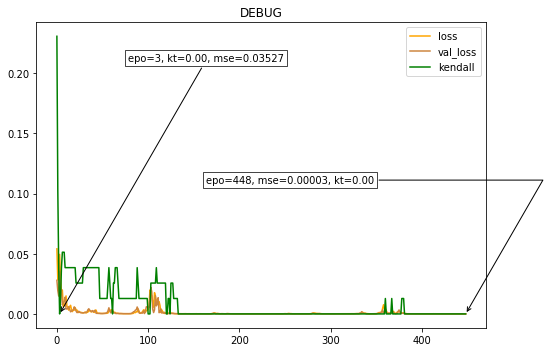

Create inference model ... 
Done (./ongo/CFR_MODEL_LSTM[LrDsDsDsDsDr_f11hn512bs3dp0.001]_Model_R0_aefghijklm_v2_LTB_spc1.h5)

Predict (VERSION 2, num_ftr: 11) ...
all_pred.shape: (10, 36, 1)

Output result ...
R0_LrDsDsDsDsDr_f11hn512bs3dp0.001_mse0.00114059_cut0.00168680_aefghijklm_v2_LTB_spc1



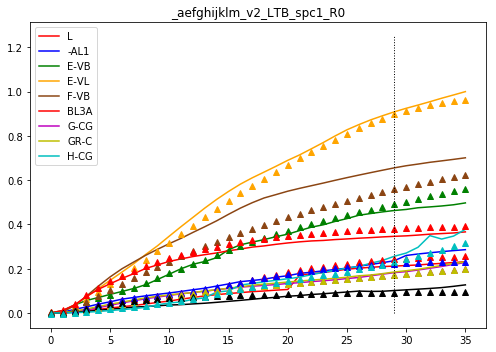

In [17]:
experiment(TARGET, s_all_norm_f, c_dft_norm,
           list(range(len(c_dft_norm))),
           list(range(len(c_dft_norm))),
           list(range(len(c_dft_norm))), nfx=nfx, VERSION=VERSION, repeats=1)
